In [ ]:
## Baseball Case Study

In [ ]:
Importing requried Libraries:

In [17]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [18]:
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [ ]:
Identifing type of problem:

In [5]:
#Checking the data type of each attribute
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [ ]:
As per problem statement Target variable i.e. W is int64 i.e. continuous value so we Regression to learn our model.

In [ ]:
Exploratory Data Analysis:

In [6]:
#Checking shape of dataset
df.shape

(30, 17)

In [ ]:
There are 30 rows and 17 columns in my dataset.

In [7]:
#Checking the data types of all columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [ ]:
ERA is a float type data and except ERA all columns are int type data.

In [8]:
#Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [ ]:
So,I can there is a(1)float64 vallue and (16)int value and there are no null values.

In [9]:
#Checking unique values of each columns
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [ ]:
So, I can see these are number of unique values in each column.

In [10]:
#Checking null values in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [ ]:
No missing values are present in the given dataset.

In [11]:
#Checking value counts of target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [13]:
## I can see there are no missing values or spaaces in the target column.

In [14]:
#Checking description of dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [ ]:
I can observe that all the columns have the count value of 30 there are no negative values and Few columns have very low 
values in it, where few have very low values in it, where few have very high values in the datset.

In [ ]:
Data Visualization:
Univariate Analysis:    

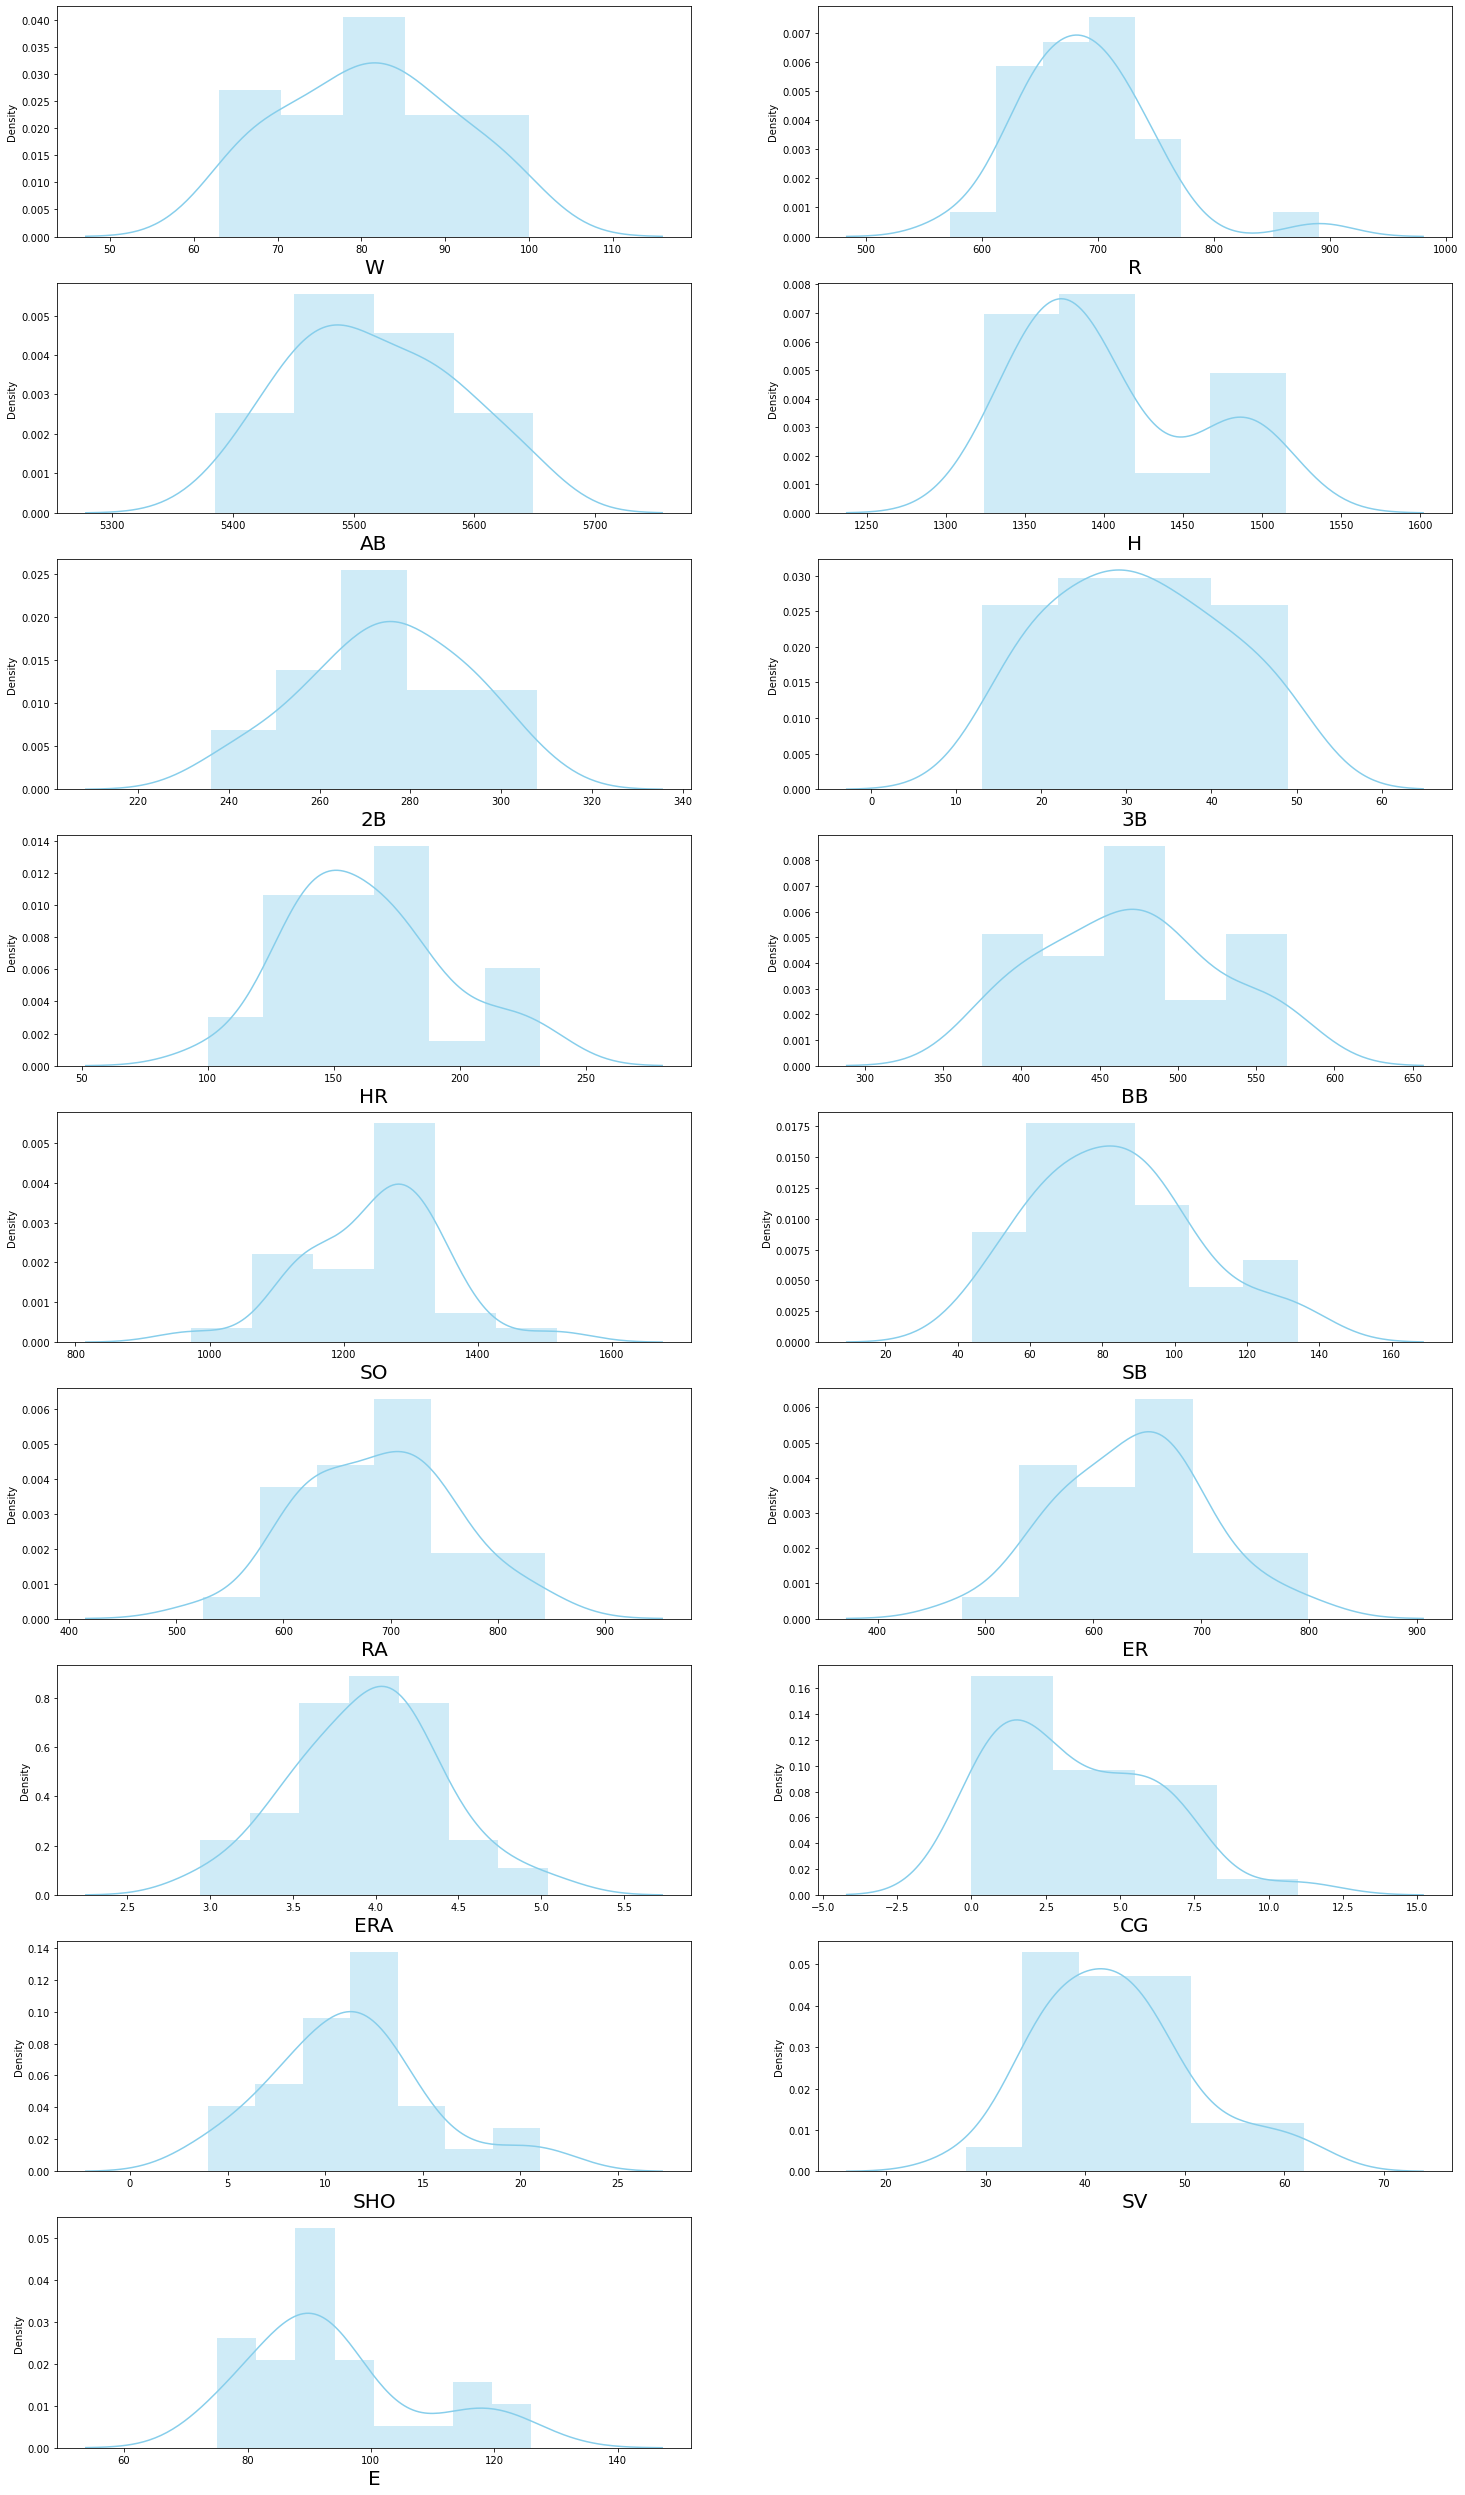

In [15]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [ ]:
Almost all the columns are normally distributed.Except R,SO,CG and E.

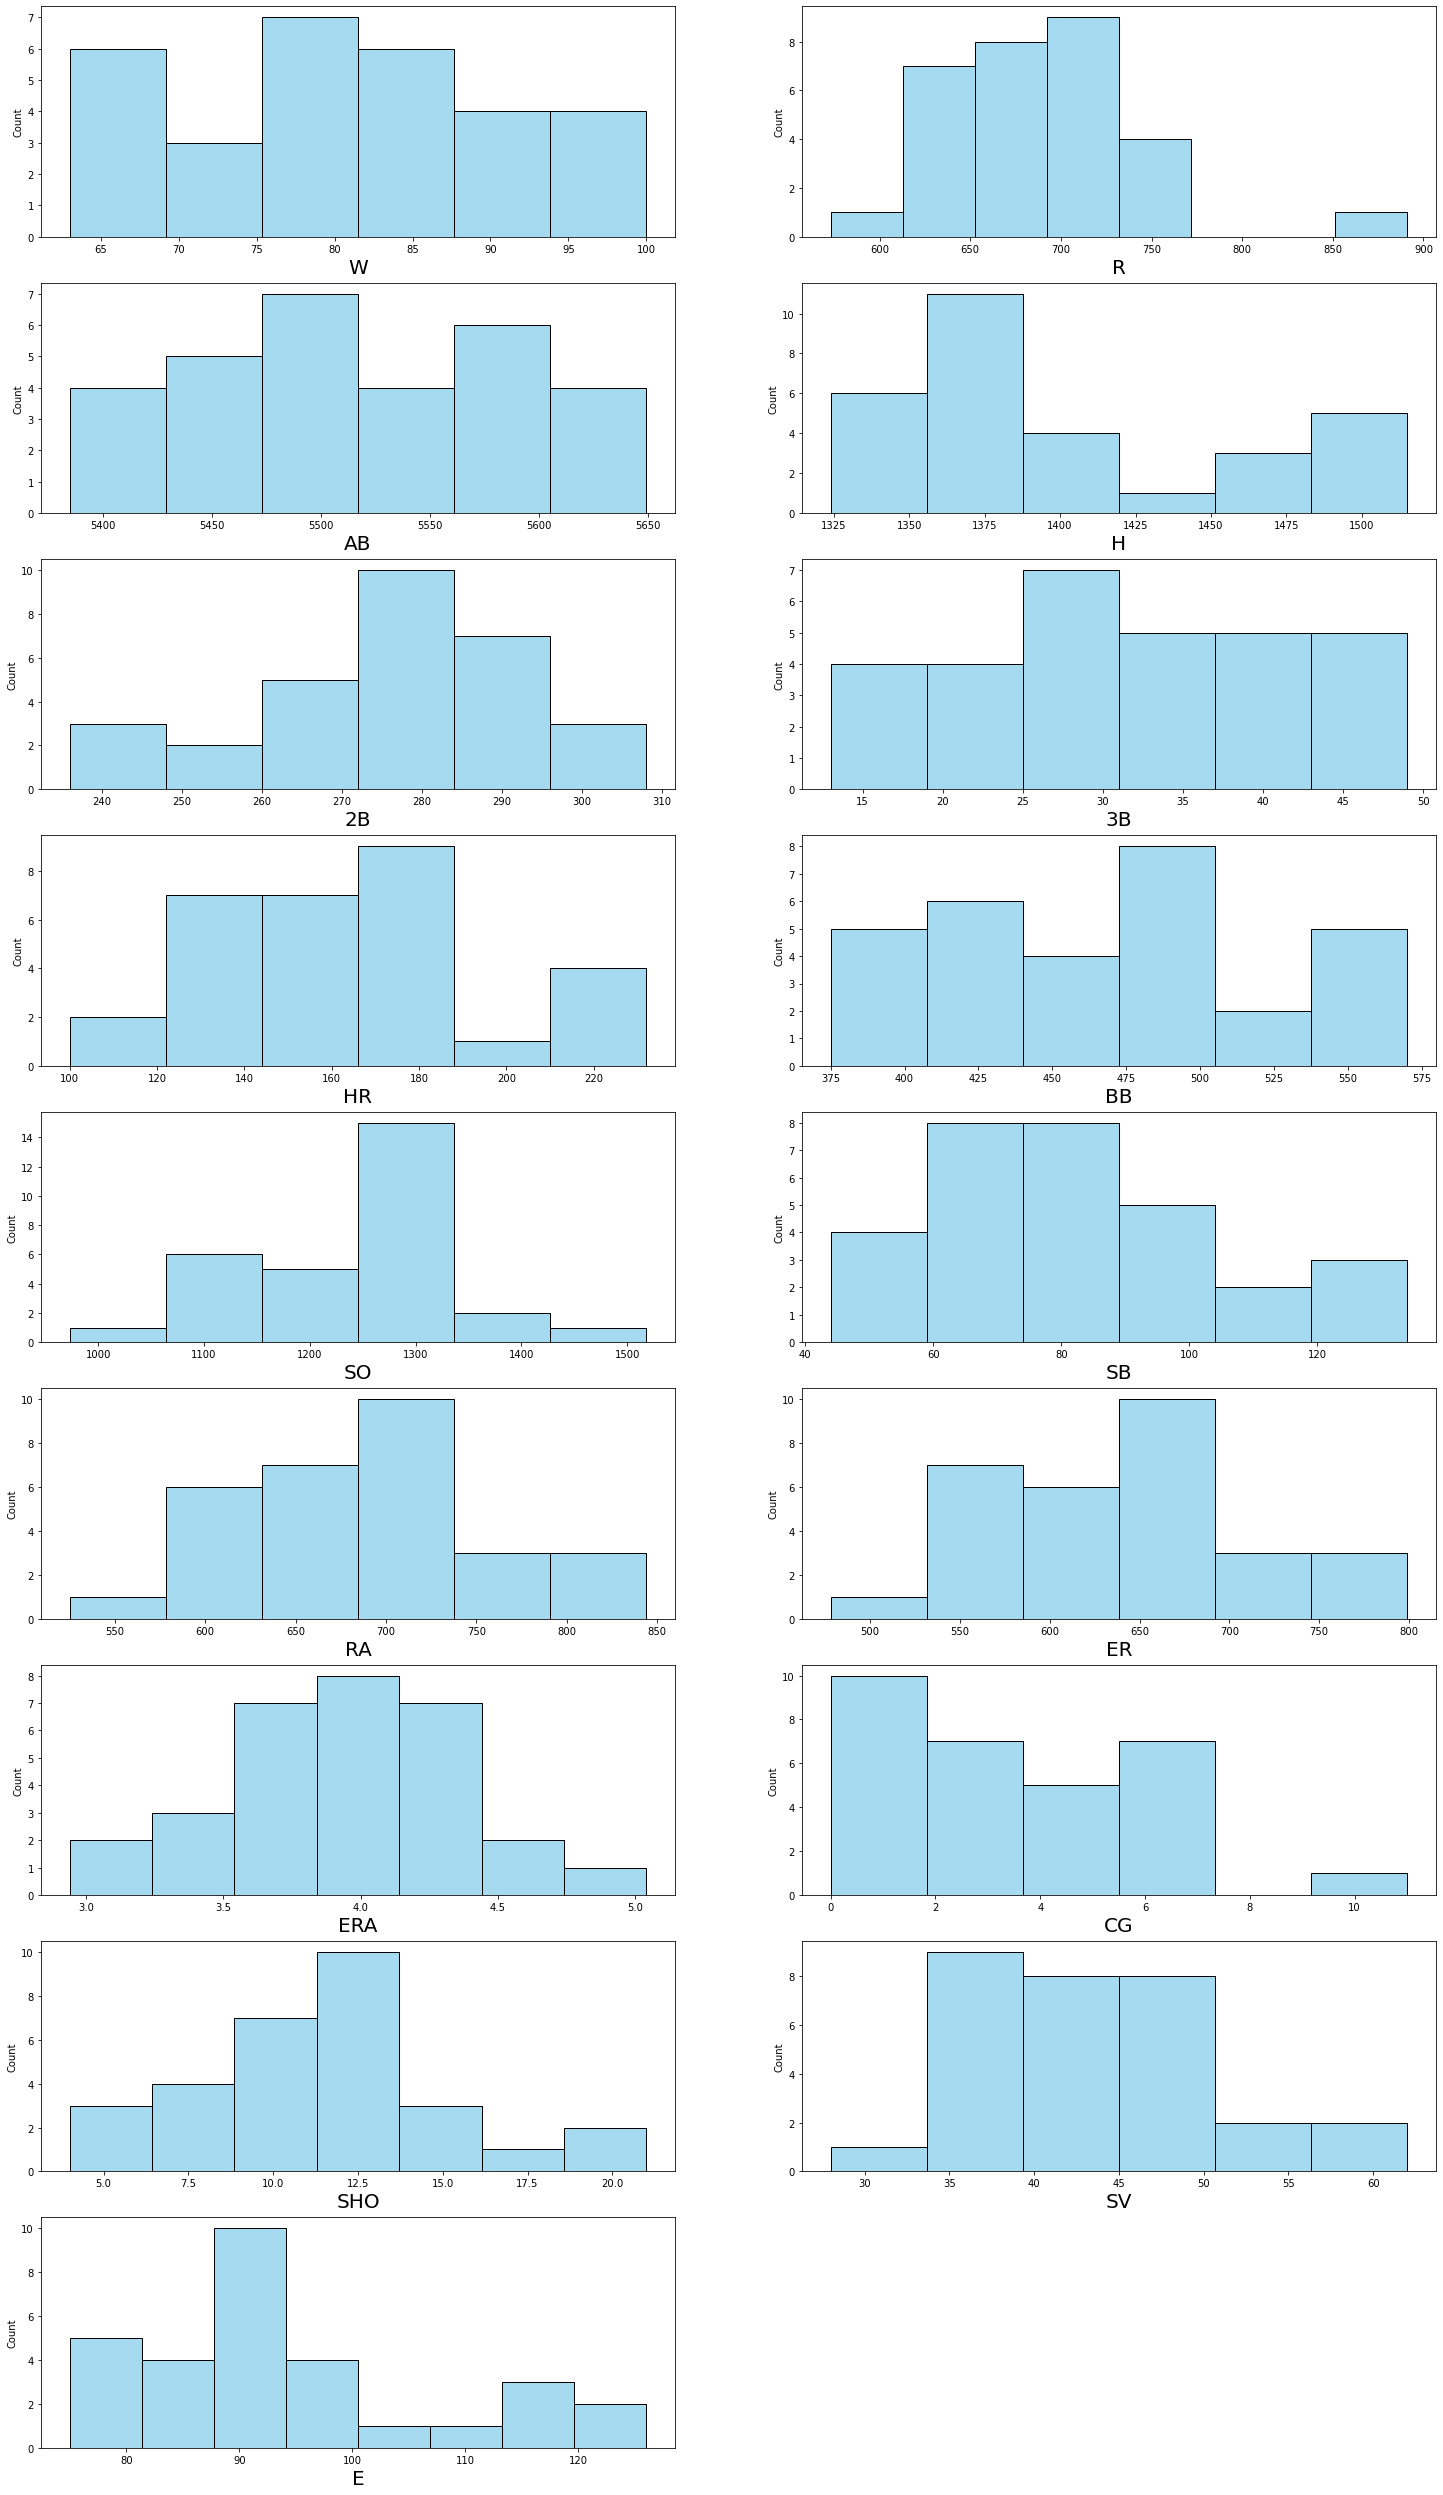

In [16]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

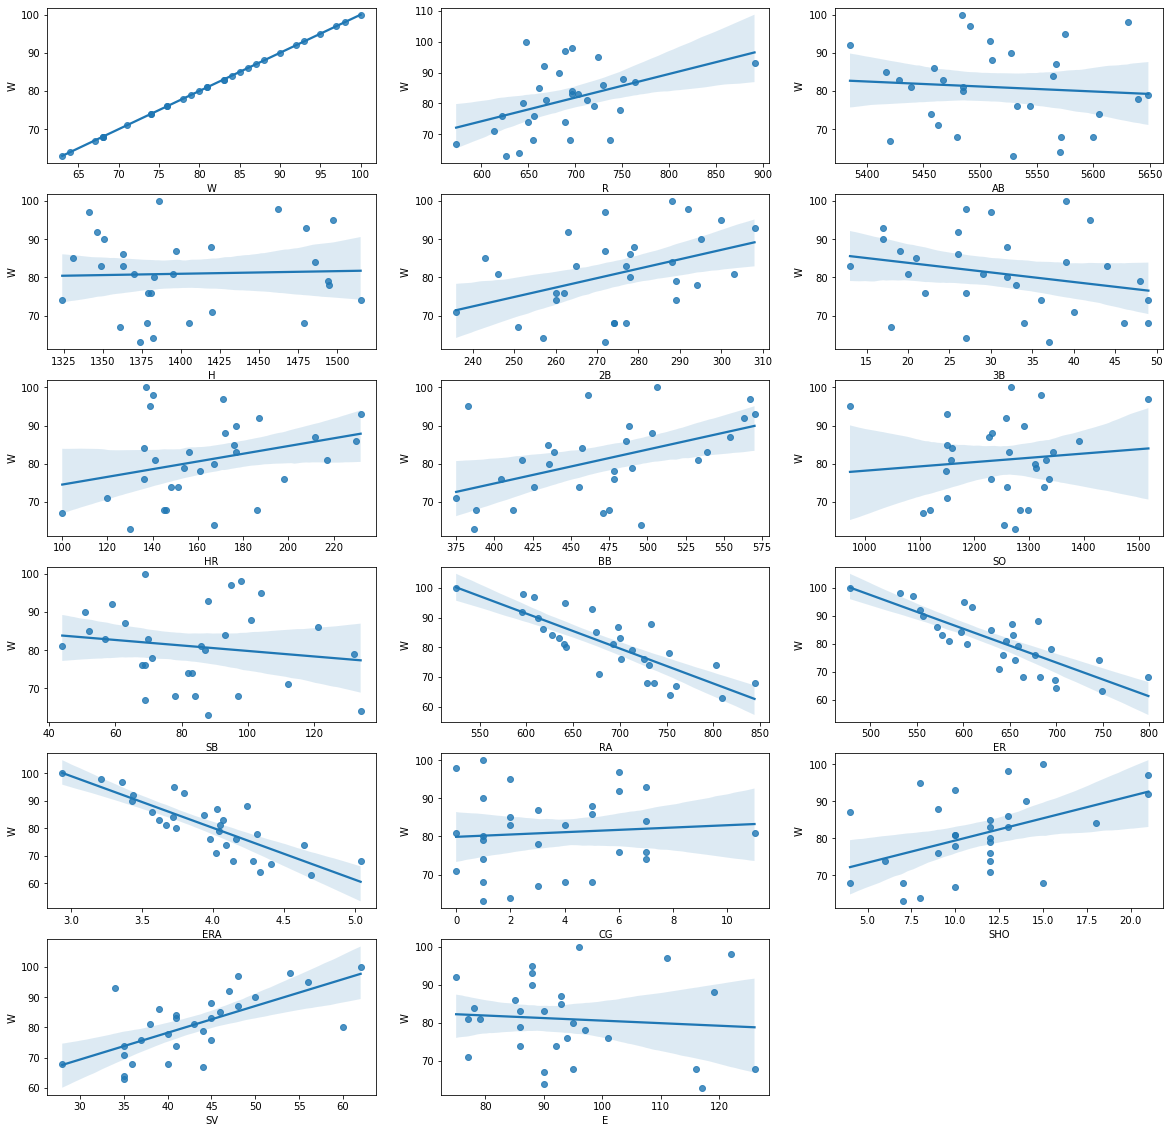

In [19]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(x=column,y='W',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

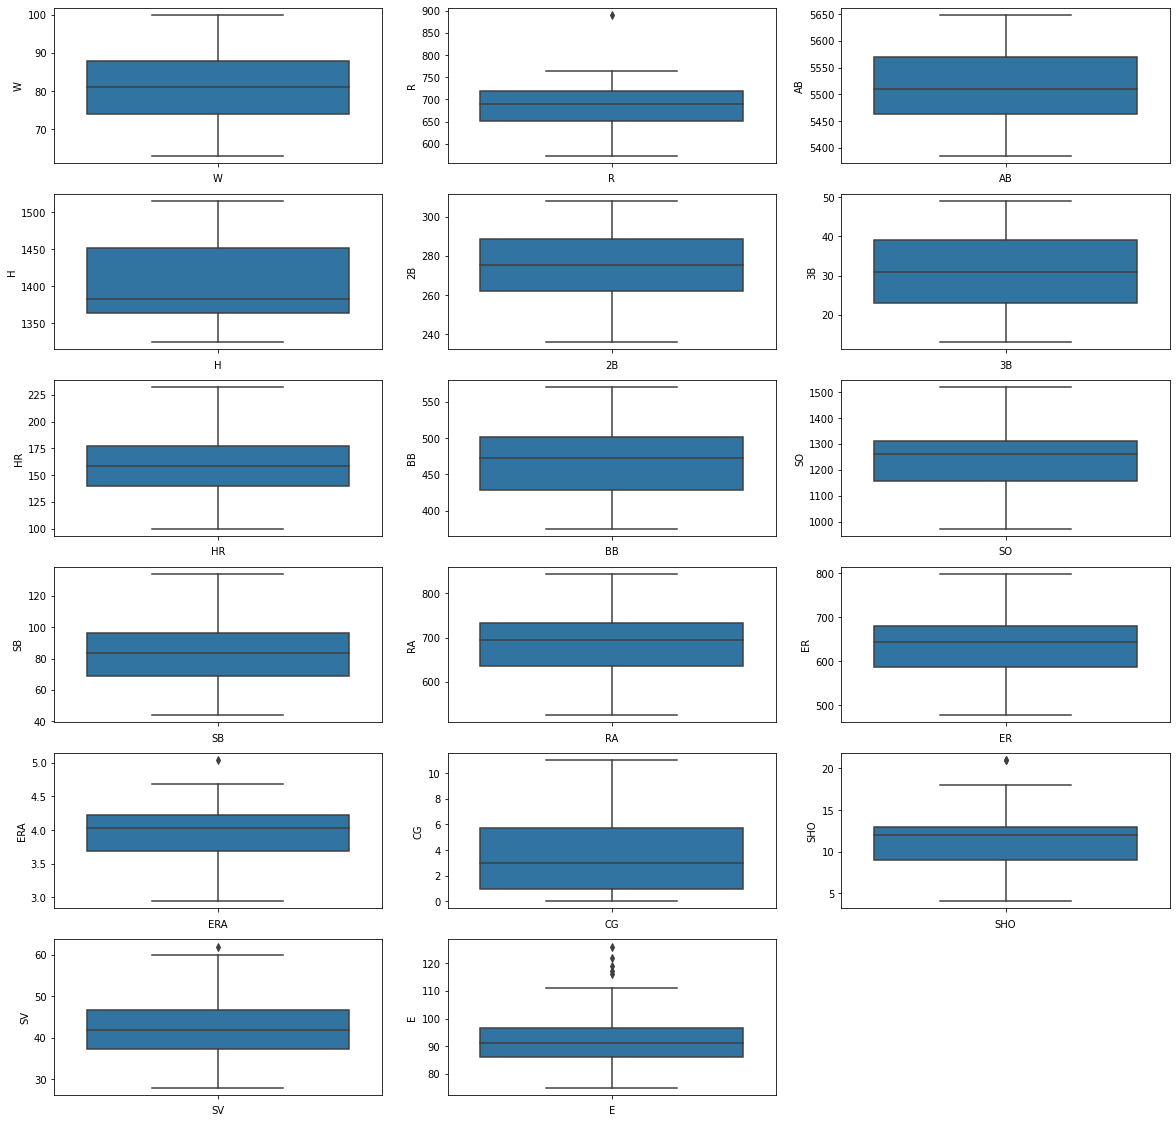

In [20]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
Columns with High Positive correlation: runs, homeruns, doubles, walks, saves and shoutouts.
Columns with High Negative correlation: stolen bases, earned runs, avg. earned runs and run average
Remaining fields have less or very little correlation with Wins.
Checking Multi-Collinearity (using Heat Map)

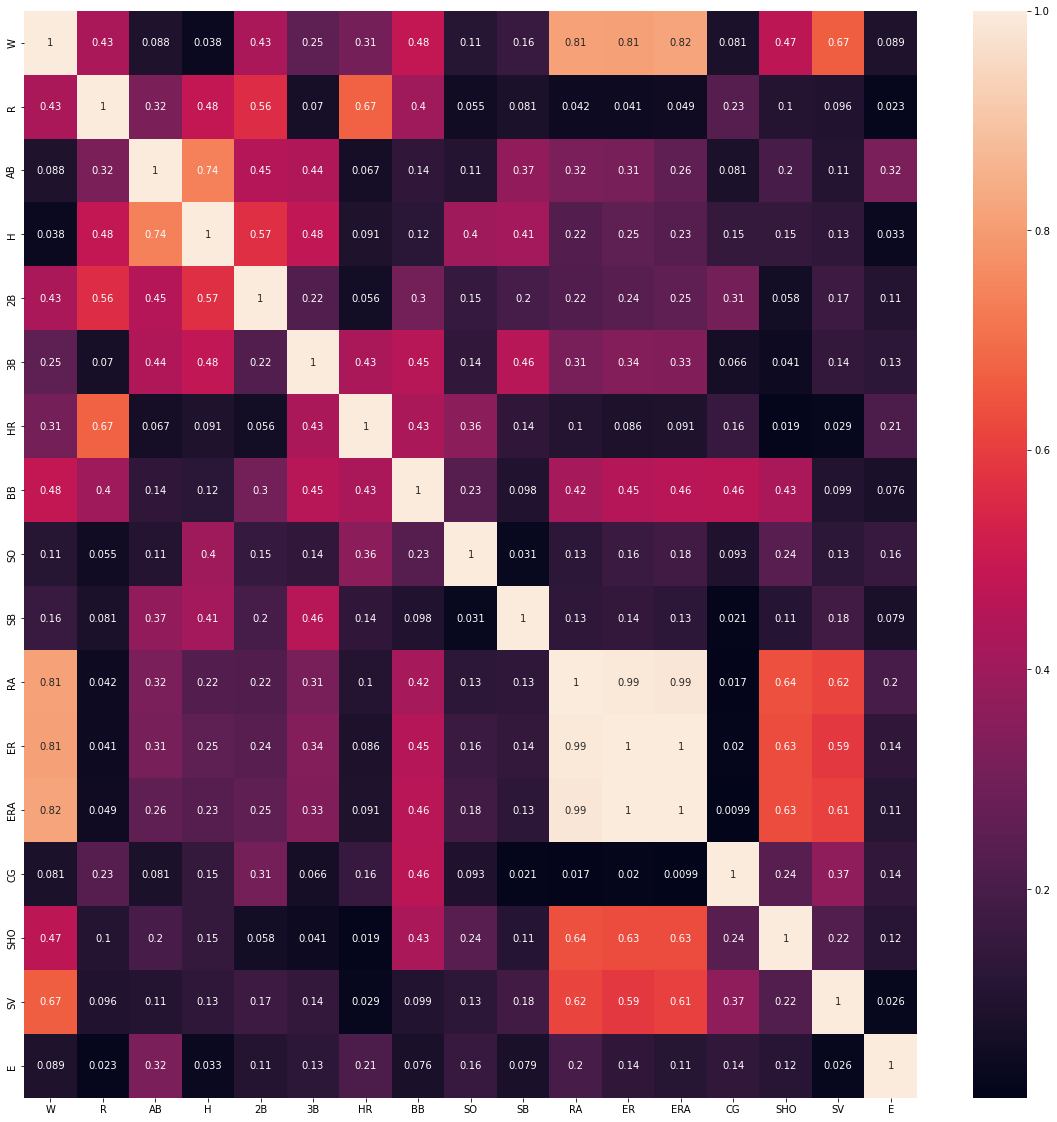

In [21]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

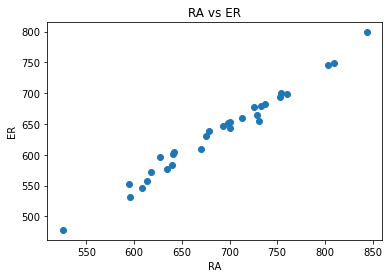

In [22]:
plt.scatter(df['RA'], df['ER'])
plt.xlabel('RA')
plt.ylabel('ER')
plt.title('RA vs ER')
plt.show

In [ ]:
Now we need to remove ER column to reduce collinearity

In [23]:
df = df.drop(columns = ['ER'], axis = 1)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,4.31,3,10,40,97


In [ ]:
Check data skewness

In [24]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [ ]:
Using z-score to remove outliers

In [25]:
from scipy import stats
from scipy.stats import zscore

z_score = zscore(df[['R','ERA','SHO','SV','E']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(29, 16)

In [26]:
x = df.drop(columns = ['W'])
y = df.W

In [27]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,4.24,5,9,45,119


In [28]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [ ]:
Now that we have removed outliers, use Power Transformer to reduce skewness

In [29]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [30]:
x_scaled = scaler.fit_transform(x.values)
x_scaled

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.09292146e-01, -3.07098204e-01,
        -7.87002186e-01,  1.53275292e+00, -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.41440214e-01, -3.07098204e-01,
         2.36736538e-01,  3.12020186e-01, -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -6.42097599e-01,  2.01131531e+00,
        -2.52844176e-01, -6.64136739e-01, -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e+00,  0.00000000e+00,
        -8.37664770e-01, -4.32227907e-01, -8.60039342

In [ ]:
Now, we use PCA to perform dimension reduction for our model

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_scaled)

array([[ 5.71086351e-01,  6.63407997e-01, -2.93897798e+00,
         1.22245668e+00, -2.61538865e+00, -5.55949506e-02,
         4.43002321e-01,  2.12980594e-01,  1.02877548e+00,
        -1.85245215e-01, -2.93931320e-01, -1.92305965e-02,
         7.53695997e-02,  3.41875250e-18, -1.68455664e-18],
       [ 3.09909611e-01,  1.05347739e-01, -4.35880889e-01,
         2.45752563e-01, -4.49710962e-01,  6.93613011e-01,
        -1.00900984e+00, -5.56545115e-01, -2.23070899e-01,
        -3.57759159e-01,  2.70848114e-01, -1.36141125e-01,
        -5.58158394e-03, -1.56887959e-16,  1.44274653e-16],
       [-8.73528088e-01, -6.72132383e-01, -1.54326015e+00,
        -2.31726538e+00, -1.13095279e+00, -5.50879837e-01,
         1.15686663e+00, -5.90803789e-01, -1.85071866e-01,
         1.17059933e+00,  4.30543981e-01,  1.52412704e-01,
        -3.09177375e-02,  4.39087522e-16,  3.83267967e-17],
       [ 1.16509129e+00,  1.08306234e+00,  7.52082699e-01,
        -1.11169417e+00,  4.14396354e-01, -1.04746117

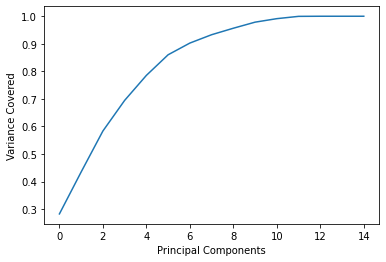

In [32]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

In [ ]:
We can see, we only need about 11 components to cover 99% of variance

In [33]:
pca = PCA (n_components = 11)
new_pcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(new_pcomp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.571086,0.663408,-2.938978,1.222457,-2.615389,-0.055595,0.443002,0.212981,1.028775,-0.185245,-0.293931
1,0.309910,0.105348,-0.435881,0.245753,-0.449711,0.693613,-1.009010,-0.556545,-0.223071,-0.357759,0.270848
2,-0.873528,-0.672132,-1.543260,-2.317265,-1.130953,-0.550880,1.156867,-0.590804,-0.185072,1.170599,0.430544
3,1.165091,1.083062,0.752083,-1.111694,0.414396,-1.047461,-0.186494,-0.164016,1.306421,0.711298,0.329007
4,2.058597,-1.395959,-0.849413,-1.484319,0.017044,0.403729,-0.907026,-1.106162,-0.477649,-0.027760,-0.161895
5,-0.820264,-2.279288,1.766467,1.149468,-1.698343,-0.910790,1.140572,0.339598,-0.275117,-0.415748,0.815290
6,-0.633713,0.341329,3.285248,1.221017,-1.350623,1.639205,-1.025659,0.180808,-0.403863,0.334545,-0.102314
7,-1.050560,1.153078,-0.371180,1.512627,0.380763,0.223315,0.110591,-0.888039,0.525841,-0.372595,-0.346771
8,0.826987,-1.551383,-0.568121,0.102023,-1.312555,-0.889678,-0.519738,0.345237,-0.747488,-0.089437,-0.449173
9,0.494140,-2.148590,-0.443398,0.615620,0.209990,-1.105135,0.447817,0.511873,0.322366,-0.954743,-0.200155


In [34]:
princi_comp.skew()

PC1    -0.022801
PC2     0.212534
PC3     0.097225
PC4    -0.306403
PC5     0.164546
PC6     0.604134
PC7     0.436632
PC8     0.701139
PC9     0.541215
PC10    0.413815
PC11    0.916838
dtype: float64

In [35]:
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size=0.25,random_state=42)

In [36]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test,pred)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x,y,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test,pred))
        print('MSE = ',mean_squared_error(y_test,pred))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))

In [39]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 91.60%

 ======TESTING RESULT======
Accuracy Score: 83.25%
Cross Validation Score =  0.07668550883241376
MAE =  3.656101044997275
MSE =  18.4185815631513
RMSE =  4.2916874959800255


In [ ]:
We can note that we are getting training accuracy of 91.6% and Testing accuracy of 83.25% with Linear Regression model

We should now test the data on other models as well to check which model is giving us the best result


In [40]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
xgb = XGBRegressor()

In [41]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.8324631580384191
0.5475156338828878
0.5542922114837976
0.5531454235360997
0.2904114285169589


In [ ]:
We can note, Linear Regression is by far our best performing model.

Now we need to check for overfitting

I'll be using Ridge regularization for this

In [43]:
from sklearn.linear_model import Ridge, RidgeCV

In [44]:
ridgecv = RidgeCV(alphas = np.arange(0.001,10,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       9.661e+00, 9.671e+00, 9.681e+00, 9.691e+00, 9.701e+00, 9.711e+00,
       9.721e+00, 9.731e+00, 9.741e+00, 9.751e+00, 9.761e+00, 9.771e+00,
       9.781e+00, 9.791e+00, 9.801e+00, 9.811e+00, 9.821e+00, 9.831e+00,
       9.841e+00, 9.851e+00, 9.861e+00, 9.871e+00, 9.881e+00, 9.891e+00,
       9.901e+00, 9.911e+00, 9.921e+00, 9.931e+00, 9.941e+00, 9.951e+00,
       9.961e+00, 9.971e+00, 9.981e+00, 9.991e+00]),
        normalize=True)

In [45]:
ridgecv.alpha_

0.141

In [46]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.141)

In [47]:
ridge_model.score(x_test,y_test)

0.8317790579828878

In [ ]:
We get very similar score to our R2 score, thus we can conclude, model is not overfitting.

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(Ridge(), ridge_params, cv=3)
grid.fit(x_train, y_train)
print('Best score:', grid.best_score_)
print('Best score:', grid.best_params_)
print('Best score:', grid.best_estimator_)

Best score: 0.7572971780332054
Best score: {'alpha': 7}
Best score: Ridge(alpha=7)


In [ ]:
We are getting better score without hyperparameter tuning, Therefore we stick with our original model.